# Protest for Happiness Analysis 
    * Fereshteh Aghaei
    * Jen Mahon
    * Julia Squeri
    * John Shuford
#### Final Observation and Analysis: 
* -
* -
* -

In [1]:
# Magic Function for graphs/displays
%matplotlib inline

In [2]:
# Importing our Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
#from config import api_key
from pprint import pprint


# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

## Load & Read CSV files

In [3]:
clean_combined_happiness = pd.read_csv("Happiness_Data/clean_combined_happiness.csv")
clean_combined_happiness.head()

,Country,Region,Total Happiness Score,Total Freedom Rate,2015 Happiness Rank,2015 Happiness Score,2015 Economy,2015 Family,2015 Health,2015 Freedom,...,2018 Generosity,2018 Dystopia Residual,2019 Happiness Rank,2019 Happiness Score,2019 Economy,2019 Family,2019 Health,2019 Freedom,2019 Generosity,2019 Dystopia Residual
0,Switzerland,Western Europe,37.557,3.103211,1.0,7.587,1.39651,1.34951,0.94143,0.66557,...,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,Iceland,Western Europe,37.555,3.090173,2.0,7.561,1.30232,1.40223,0.94784,0.62877,...,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,Denmark,Western Europe,37.730,3.129797,3.0,7.527,1.32548,1.36058,0.87464,0.64938,...,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,Western Europe,37.705,3.190243,4.0,7.522,1.45900,1.33095,0.88521,0.66973,...,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Canada,North America,36.753,3.054771,5.0,7.427,1.32629,1.32261,0.90563,0.63297,...,0.321,0.291,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [4]:
Protest_Data = pd.read_csv("Mass_Movement_Data/movement_data.csv")
Protest_Data.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,total protests
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6
1,Colombia,2017,2017-01-22,2017-01-22,0 days,South America,Bogot,100-999,"political behavior, process",crowd dispersal,6
2,Colombia,2017,2017-04-01,2017-04-15,14 days,South America,Bogota,1000-1999,"political behavior, process",ignore,6
3,Colombia,2017,2017-10-05,2017-10-05,0 days,South America,Tumaco,50-99,land farm issue,crowd dispersal,6
4,Colombia,2018,2018-01-26,2018-01-26,0 days,South America,Bogota,2000-4999,social restrictions,crowd dispersal,6


### Count of protests
* How many total protests occurred per region? How does this differ between the regions?
        Bar chart of #
        ANOVA to find differences between 3 group means
        Can show in boxplot
* Heat map to show protests across regions and what countries have the most


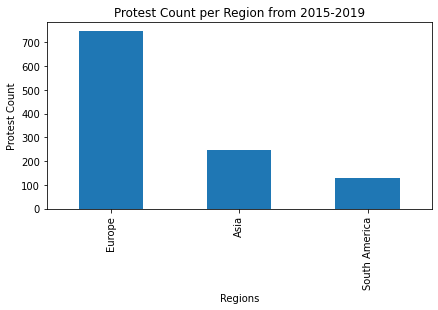

In [5]:
#Get count of how many protests per region
regions = Protest_Data['region'].value_counts()

regions.plot(kind='bar')
plt.tight_layout()
plt.xlabel("Regions")
plt.ylabel("Protest Count")
plt.title("Protest Count per Region from 2015-2019")
plt.show()

In [6]:
europe = Protest_Data.loc[Protest_Data['region']== 'Europe']
europe_count = europe['country'].value_counts()
europe_count

Germany            117
France             110
United Kingdom      80
Romania             52
Spain               47
Greece              34
Ireland             34
Russia              32
Italy               26
Armenia             22
Poland              22
Moldova             21
Slovak Republic     14
Hungary             14
Albania             13
Macedonia           12
Bosnia              11
Belgium             10
Belarus              9
Czech Republic       8
Serbia               7
Croatia              7
Georgia              7
Latvia               6
Sweden               6
Kosovo               6
Bulgaria             5
Cyprus               5
Finland              5
Portugal             5
Name: country, dtype: int64

<AxesSubplot:>

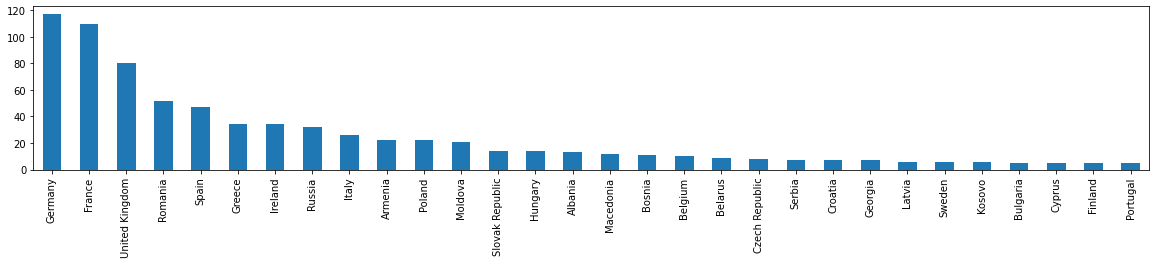

In [7]:
europe_count.plot(kind='bar', figsize=(20,3))

### Size of protest
* How many people attended the protests per region/what was the average protest size?
        * Bar chart of #
        * ANOVA to find differences between 3 group means
                * Can show in boxplot


In [8]:
#Creates bins for protest size
bins = [0,1,2,3,4,5]

group_names = ["50-99", "100-999", "1000-1999","2000-4999","5000-10000", ">10000"]

In [9]:
south_america_count = Protest_Data.loc[Protest_Data['region'] == 'South America', 'participants_category'].value_counts()
europe_count = Protest_Data.loc[Protest_Data['region'] == 'Europe', 'participants_category'].value_counts()
asia_count = Protest_Data.loc[Protest_Data['region'] == 'Asia', 'participants_category'].value_counts()

In [10]:
protest_size_df = pd.DataFrame({"South America": south_america_count,
                               "Europe": europe_count,
                               "Asia": asia_count})
protest_size_df

,South America,Europe,Asia
100-999,32,153,91
1000-1999,4,28,10
2000-4999,24,157,48
50-99,23,193,51
5000-10000,12,71,16
>10000,32,145,31


In [11]:
protest_size_df = protest_size_df.reset_index()
protest_size_df

,index,South America,Europe,Asia
0,100-999,32,153,91
1,1000-1999,4,28,10
2,2000-4999,24,157,48
3,50-99,23,193,51
4,5000-10000,12,71,16
5,>10000,32,145,31


In [12]:
protest_size_df2 = protest_size_df.reindex([3,0,1,2,4,5])
protest_df3 = protest_size_df2.set_index('index')
protest_df3

,South America,Europe,Asia
index,,,
50-99,23,193,51
100-999,32,153,91
1000-1999,4,28,10
2000-4999,24,157,48
5000-10000,12,71,16
>10000,32,145,31


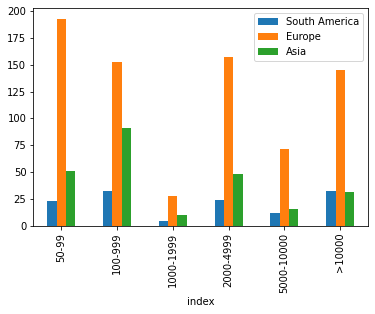

In [13]:
multi_plot = protest_df3.plot(kind="bar")

### Protest type
* What was the reason for the protest? (I.e, political behavior, police brutality, political process, etc) How does this differ between the regions?
        * Bar chart of #
        * ANOVA to find differences between 3 group means
                * Can show in boxplot
                * Can expand on these analyses to look at the protest breakdown per region (i.e, protests in europe)


In [14]:
Protest_Data.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,total protests
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6
1,Colombia,2017,2017-01-22,2017-01-22,0 days,South America,Bogot,100-999,"political behavior, process",crowd dispersal,6
2,Colombia,2017,2017-04-01,2017-04-15,14 days,South America,Bogota,1000-1999,"political behavior, process",ignore,6
3,Colombia,2017,2017-10-05,2017-10-05,0 days,South America,Tumaco,50-99,land farm issue,crowd dispersal,6
4,Colombia,2018,2018-01-26,2018-01-26,0 days,South America,Bogota,2000-4999,social restrictions,crowd dispersal,6


In [15]:
sa_reason = Protest_Data.loc[Protest_Data['region'] == 'South America', 'protesterdemand1'].value_counts()
europe_reason = Protest_Data.loc[Protest_Data['region'] == 'Europe', 'protesterdemand1'].value_counts()
asia_reason = Protest_Data.loc[Protest_Data['region'] == 'Asia', 'protesterdemand1'].value_counts()

Text(0.5, 1.0, 'South America Protest Reasons')

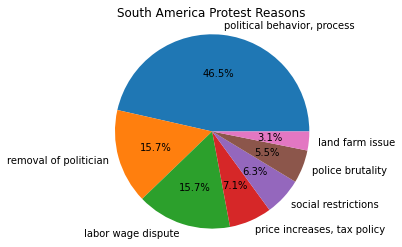

In [16]:
sa_reason.plot(kind='pie', autopct="%1.1f%%", ylabel= " ")
plt.axis("equal")
plt.title("South America Protest Reasons")

Text(0.5, 1.0, 'Europe Protest Reasons')

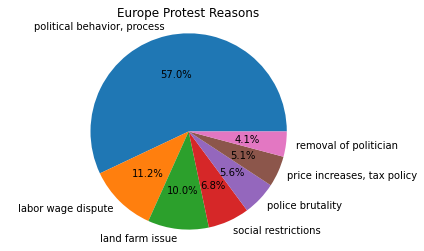

In [17]:
europe_reason.plot(kind='pie', autopct="%1.1f%%", ylabel= " ")
plt.axis("equal")
plt.title("Europe Protest Reasons")

Text(0.5, 1.0, 'Asia Protest Reasons')

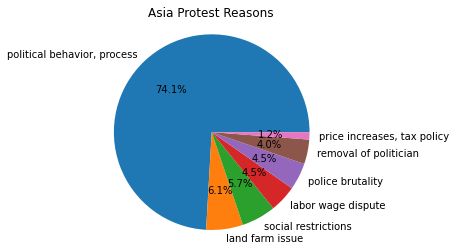

In [18]:
asia_reason.plot(kind='pie', autopct="%1.1f%%", ylabel= " ")
plt.axis("equal")
plt.title("Asia Protest Reasons")

### Happiness score
* From World Happiness Report
        * Bar chart or box plot to show difference of happiness score between regions being compared
* Do the number/frequency of protests in a country affect how happy the country is?
        * Line chart happiness rating/protest numbers over the years
        * Scatter plot


In [19]:
clean_combined_happiness = clean_combined_happiness.rename(columns={"Country":"country"})

In [23]:
germany_happiness = clean_combined_happiness.loc[clean_combined_happiness['country']=='Germany']

germany_protest = Protest_Data.loc[Protest_Data['country']=='Germany']

In [30]:
germany_happiness_df = germany_happiness.T
germany_happiness_df

,25
country,Germany
Region,Western Europe
Total Happiness Score,34.645
Total Freedom Rate,2.79294
2015 Happiness Rank,26
2015 Happiness Score,6.75
2015 Economy,1.32792
2015 Family,1.29937
2015 Health,0.89186
2015 Freedom,0.61477


In [29]:
germany_happiness_df = germany_happiness_df.reset_index()
germany_happiness_df
#Rename index year, for x in DF 
for x in germany_happiness_df:
    x.split()[0]
    print(x)

for index,row in germany_happiness_df.iterrows():
    

ValueError: cannot insert level_0, already exists

In [20]:
#Countries and happiness score
happiness_protest_df = pd.merge(Protest_Data, clean_combined_happiness, on='country', how='left')
happiness_protest_df.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,...,2018 Generosity,2018 Dystopia Residual,2019 Happiness Rank,2019 Happiness Score,2019 Economy,2019 Family,2019 Health,2019 Freedom,2019 Generosity,2019 Dystopia Residual
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,...,0.099,0.039,43.0,6.125,0.985,1.41,0.841,0.47,0.099,0.034
1,Colombia,2017,2017-01-22,2017-01-22,0 days,South America,Bogot,100-999,"political behavior, process",crowd dispersal,...,0.099,0.039,43.0,6.125,0.985,1.41,0.841,0.47,0.099,0.034
2,Colombia,2017,2017-04-01,2017-04-15,14 days,South America,Bogota,1000-1999,"political behavior, process",ignore,...,0.099,0.039,43.0,6.125,0.985,1.41,0.841,0.47,0.099,0.034
3,Colombia,2017,2017-10-05,2017-10-05,0 days,South America,Tumaco,50-99,land farm issue,crowd dispersal,...,0.099,0.039,43.0,6.125,0.985,1.41,0.841,0.47,0.099,0.034
4,Colombia,2018,2018-01-26,2018-01-26,0 days,South America,Bogota,2000-4999,social restrictions,crowd dispersal,...,0.099,0.039,43.0,6.125,0.985,1.41,0.841,0.47,0.099,0.034


In [22]:
germany_df = happiness_protest_df.loc[happiness_protest_df['country']=='Germany']



ger_happiness = happiness_protest_df.loc[happiness_protest_df,["2015 Happiness Score", "2016 Happiness Score", 
                                                  "2017 Happiness Score", "2018 Happiness Score", "2019 Happiness Score"]]


plt.scatter(germany_df, ger_happiness)
#plt.show()
#y_axis = germany_df.loc[germany_df['Total Happiness Score']]

#plt.scatter(germany_df, y_axis)

KeyError: "None of [Index([                                                                           ('c', 'o', 'u', 'n', 't', 'r', 'y'),\n                                                                                                 ('y', 'e', 'a', 'r'),\n                                                                                            ('s', 't', 'a', 'r', 't'),\n                                                                                                      ('e', 'n', 'd'),\n                                     ('p', 'r', 'o', 't', 'e', 's', 't', '_', 'd', 'u', 'r', 'a', 't', 'i', 'o', 'n'),\n                                                                                       ('r', 'e', 'g', 'i', 'o', 'n'),\n                                                                             ('l', 'o', 'c', 'a', 't', 'i', 'o', 'n'),\n            ('p', 'a', 'r', 't', 'i', 'c', 'i', 'p', 'a', 'n', 't', 's', '_', 'c', 'a', 't', 'e', 'g', 'o', 'r', 'y'),\n                                     ('p', 'r', 'o', 't', 'e', 's', 't', 'e', 'r', 'd', 'e', 'm', 'a', 'n', 'd', '1'),\n                                               ('s', 't', 'a', 't', 'e', 'r', 'e', 's', 'p', 'o', 'n', 's', 'e', '1'),\n                                               ('t', 'o', 't', 'a', 'l', ' ', 'p', 'r', 'o', 't', 'e', 's', 't', 's'),\n                                                                                       ('R', 'e', 'g', 'i', 'o', 'n'),\n            ('T', 'o', 't', 'a', 'l', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'S', 'c', 'o', 'r', 'e'),\n                           ('T', 'o', 't', 'a', 'l', ' ', 'F', 'r', 'e', 'e', 'd', 'o', 'm', ' ', 'R', 'a', 't', 'e'),\n                      ('2', '0', '1', '5', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'R', 'a', 'n', 'k'),\n                 ('2', '0', '1', '5', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'S', 'c', 'o', 'r', 'e'),\n                                                         ('2', '0', '1', '5', ' ', 'E', 'c', 'o', 'n', 'o', 'm', 'y'),\n                                                              ('2', '0', '1', '5', ' ', 'F', 'a', 'm', 'i', 'l', 'y'),\n                                                              ('2', '0', '1', '5', ' ', 'H', 'e', 'a', 'l', 't', 'h'),\n                                                         ('2', '0', '1', '5', ' ', 'F', 'r', 'e', 'e', 'd', 'o', 'm'),\n            ('2', '0', '1', '5', ' ', 'C', 'o', 'r', 'r', 'u', 'p', 't', 'i', 'o', 'n', '/', 'T', 'r', 'u', 's', 't'),\n                                          ('2', '0', '1', '5', ' ', 'G', 'e', 'n', 'e', 'r', 'o', 's', 'i', 't', 'y'),\n       ('2', '0', '1', '5', ' ', 'D', 'y', 's', 't', 'o', 'p', 'i', 'a', ' ', 'R', 'e', 's', 'i', 'd', 'u', 'a', 'l'),\n                      ('2', '0', '1', '6', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'R', 'a', 'n', 'k'),\n                 ('2', '0', '1', '6', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'S', 'c', 'o', 'r', 'e'),\n                                                         ('2', '0', '1', '6', ' ', 'E', 'c', 'o', 'n', 'o', 'm', 'y'),\n                                                              ('2', '0', '1', '6', ' ', 'F', 'a', 'm', 'i', 'l', 'y'),\n                                                              ('2', '0', '1', '6', ' ', 'H', 'e', 'a', 'l', 't', 'h'),\n                                                         ('2', '0', '1', '6', ' ', 'F', 'r', 'e', 'e', 'd', 'o', 'm'),\n            ('2', '0', '1', '6', ' ', 'C', 'o', 'r', 'r', 'u', 'p', 't', 'i', 'o', 'n', '/', 'T', 'r', 'u', 's', 't'),\n                                          ('2', '0', '1', '6', ' ', 'G', 'e', 'n', 'e', 'r', 'o', 's', 'i', 't', 'y'),\n       ('2', '0', '1', '6', ' ', 'D', 'y', 's', 't', 'o', 'p', 'i', 'a', ' ', 'R', 'e', 's', 'i', 'd', 'u', 'a', 'l'),\n                      ('2', '0', '1', '7', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'R', 'a', 'n', 'k'),\n                 ('2', '0', '1', '7', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'S', 'c', 'o', 'r', 'e'),\n                                                         ('2', '0', '1', '7', ' ', 'E', 'c', 'o', 'n', 'o', 'm', 'y'),\n                                                              ('2', '0', '1', '7', ' ', 'F', 'a', 'm', 'i', 'l', 'y'),\n                                                              ('2', '0', '1', '7', ' ', 'H', 'e', 'a', 'l', 't', 'h'),\n                                                         ('2', '0', '1', '7', ' ', 'F', 'r', 'e', 'e', 'd', 'o', 'm'),\n            ('2', '0', '1', '7', ' ', 'C', 'o', 'r', 'r', 'u', 'p', 't', 'i', 'o', 'n', '/', 'T', 'r', 'u', 's', 't'),\n                                          ('2', '0', '1', '7', ' ', 'G', 'e', 'n', 'e', 'r', 'o', 's', 'i', 't', 'y'),\n       ('2', '0', '1', '7', ' ', 'D', 'y', 's', 't', 'o', 'p', 'i', 'a', ' ', 'R', 'e', 's', 'i', 'd', 'u', 'a', 'l'),\n                      ('2', '0', '1', '8', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'R', 'a', 'n', 'k'),\n                 ('2', '0', '1', '8', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'S', 'c', 'o', 'r', 'e'),\n                                                         ('2', '0', '1', '8', ' ', 'E', 'c', 'o', 'n', 'o', 'm', 'y'),\n                                                              ('2', '0', '1', '8', ' ', 'F', 'a', 'm', 'i', 'l', 'y'),\n                                                              ('2', '0', '1', '8', ' ', 'H', 'e', 'a', 'l', 't', 'h'),\n                                                         ('2', '0', '1', '8', ' ', 'F', 'r', 'e', 'e', 'd', 'o', 'm'),\n                                          ('2', '0', '1', '8', ' ', 'G', 'e', 'n', 'e', 'r', 'o', 's', 'i', 't', 'y'),\n       ('2', '0', '1', '8', ' ', 'D', 'y', 's', 't', 'o', 'p', 'i', 'a', ' ', 'R', 'e', 's', 'i', 'd', 'u', 'a', 'l'),\n                      ('2', '0', '1', '9', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'R', 'a', 'n', 'k'),\n                 ('2', '0', '1', '9', ' ', 'H', 'a', 'p', 'p', 'i', 'n', 'e', 's', 's', ' ', 'S', 'c', 'o', 'r', 'e'),\n                                                         ('2', '0', '1', '9', ' ', 'E', 'c', 'o', 'n', 'o', 'm', 'y'),\n                                                              ('2', '0', '1', '9', ' ', 'F', 'a', 'm', 'i', 'l', 'y'),\n                                                              ('2', '0', '1', '9', ' ', 'H', 'e', 'a', 'l', 't', 'h'),\n                                                         ('2', '0', '1', '9', ' ', 'F', 'r', 'e', 'e', 'd', 'o', 'm'),\n                                          ('2', '0', '1', '9', ' ', 'G', 'e', 'n', 'e', 'r', 'o', 's', 'i', 't', 'y'),\n       ('2', '0', '1', '9', ' ', 'D', 'y', 's', 't', 'o', 'p', 'i', 'a', ' ', 'R', 'e', 's', 'i', 'd', 'u', 'a', 'l')],\n      dtype='object')] are in the [index]"

### Freedom score/index 
* From World Happiness Report
* Does a country's freedom score correlate with the amount of protests occurring?
        * Scatter
        * Could do per region, or for one specific region/country 
            * For ex, if we see one country has a low freedom score and a low number of protests, could be more 
              meaningful to just show that countries data (does that mean the protests are suppressed? Does that mean 
              people feel like they cant protest?) 


### Perceptions of corruption/government trust
* From World Happiness Report
* Does a country's perception of corruption/trust of government  correlate with the amount of protests occurring? Does it correlate with the type of protests occurring? (i.e, does a country with low trust in its government have a greater number of anti-government protests?)
        * Scatter
        * Could do per region, or for one specific region/country 
            * For ex, if we see one country has a low trust number and a high number of protests, could be more meaningful 
               to just show that countries data (Do we see a relationship where low trust in government leads to a greater 
               number of anti-gov’t/anti-corruption protests?)
